# 5. Access satellite imagery using Python

### Search a STAC catalog

In [1]:
from pystac_client import Client
from shapely.geometry import Point

api_url = "https://earth-search.aws.element84.com/v1" # Earth Search in the SpatioTemporal Asset Catalog

client = Client.open(api_url)

collection = "sentinel-2-l2a" # a Cloud Optimized GeoTIFF Raster

point = Point(4.89, 52.37) # AMS coordinates

search = client.search(
    collections = [collection],
    intersects = point,
    max_items = 10)

print(search.matched())

1180


In [2]:
items = search.item_collection()

print(len(items))

10


In [3]:
for item in items:
    print(item)

<Item id=S2A_31UFU_20240307_0_L2A>
<Item id=S2B_31UFU_20240305_0_L2A>
<Item id=S2B_31UFU_20240302_0_L2A>
<Item id=S2A_31UFU_20240229_0_L2A>
<Item id=S2A_31UFU_20240226_0_L2A>
<Item id=S2B_31UFU_20240224_0_L2A>
<Item id=S2B_31UFU_20240221_0_L2A>
<Item id=S2A_31UFU_20240219_0_L2A>
<Item id=S2A_31UFU_20240216_0_L2A>
<Item id=S2B_31UFU_20240214_0_L2A>


In [4]:
item = items[0]

print(item.datetime, "\n\n", item.geometry, "\n\n", item.properties)

2024-03-07 10:46:26.253000+00:00 

 {'type': 'Polygon', 'coordinates': [[[5.226559456561662, 53.22881917036867], [4.802698513028401, 52.248790995179895], [6.071664488869862, 52.22257539160585], [6.141754296879459, 53.20819279121764], [5.226559456561662, 53.22881917036867]]]} 

 {'created': '2024-03-07T17:09:17.394Z', 'platform': 'sentinel-2a', 'constellation': 'sentinel-2', 'instruments': ['msi'], 'eo:cloud_cover': 31.148699, 'proj:epsg': 32631, 'mgrs:utm_zone': 31, 'mgrs:latitude_band': 'U', 'mgrs:grid_square': 'FU', 'grid:code': 'MGRS-31UFU', 'view:sun_azimuth': 161.58646946027, 'view:sun_elevation': 30.7359104725465, 's2:degraded_msi_data_percentage': 0.0168, 's2:nodata_pixel_percentage': 32.582241, 's2:saturated_defective_pixel_percentage': 0, 's2:dark_features_percentage': 0, 's2:cloud_shadow_percentage': 7.674173, 's2:vegetation_percentage': 14.040025, 's2:not_vegetated_percentage': 12.890007, 's2:water_percentage': 27.86065, 's2:unclassified_percentage': 6.384715, 's2:medium_pro

POINT (4.89 52.37)


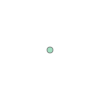

In [5]:
print(point)
point

### Exercise: Search satellite scenes using metadata filters



Search for all the available Sentinel-2 scenes in the sentinel-2-l2a collection that satisfy the following criteria: - intersect a provided bounding box (use ±0.01 deg in lat/lon from the previously defined point); - have been recorded between 20 March 2020 and 30 March 2020; - have a cloud coverage smaller than 10% (hint: use the query input argument of client.search).

How many scenes are available? Save the search results in GeoJSON format.

In [6]:
bounding_box = point.buffer(0.01).bounds
bounding_box

(4.88, 52.36, 4.8999999999999995, 52.379999999999995)

TAB, SHIFT+TAB to find client.search() documentation

Find arguments to the query parameter of client.search() in the _API documentation_

https://earth-search.aws.element84.com/v1/api.html#tag/Features/operation/getFeatures

In [7]:
search = client.search(
    collections = [collection],
    bbox = bounding_box,
    datetime = ['2020-03-20', '2020-03-30'],
    query = ["eo:cloud_cover<15"]
)
print(search.matched())

6


In [8]:
items = search.item_collection()
items.save_object("../data/search.json")

### Access the assets

In [9]:
items[0]

<Item id=S2A_31UFU_20200328_1_L2A>

In [10]:
assets = items[0].assets
print(assets.keys())

dict_keys(['aot', 'blue', 'coastal', 'granule_metadata', 'green', 'nir', 'nir08', 'nir09', 'red', 'rededge1', 'rededge2', 'rededge3', 'scl', 'swir16', 'swir22', 'thumbnail', 'tileinfo_metadata', 'visual', 'wvp', 'aot-jp2', 'blue-jp2', 'coastal-jp2', 'green-jp2', 'nir-jp2', 'nir08-jp2', 'nir09-jp2', 'red-jp2', 'rededge1-jp2', 'rededge2-jp2', 'rededge3-jp2', 'scl-jp2', 'swir16-jp2', 'swir22-jp2', 'visual-jp2', 'wvp-jp2'])


In [11]:
print(assets["aot"].title)

Aerosol optical thickness (AOT)


In [12]:
# use tuple to inspect json 
for key, asset in assets.items():
    print(f"{key}: {asset.title}")

aot: Aerosol optical thickness (AOT)
blue: Blue (band 2) - 10m
coastal: Coastal aerosol (band 1) - 60m
granule_metadata: None
green: Green (band 3) - 10m
nir: NIR 1 (band 8) - 10m
nir08: NIR 2 (band 8A) - 20m
nir09: NIR 3 (band 9) - 60m
red: Red (band 4) - 10m
rededge1: Red edge 1 (band 5) - 20m
rededge2: Red edge 2 (band 6) - 20m
rededge3: Red edge 3 (band 7) - 20m
scl: Scene classification map (SCL)
swir16: SWIR 1 (band 11) - 20m
swir22: SWIR 2 (band 12) - 20m
thumbnail: Thumbnail image
tileinfo_metadata: None
visual: True color image
wvp: Water vapour (WVP)
aot-jp2: Aerosol optical thickness (AOT)
blue-jp2: Blue (band 2) - 10m
coastal-jp2: Coastal aerosol (band 1) - 60m
green-jp2: Green (band 3) - 10m
nir-jp2: NIR 1 (band 8) - 10m
nir08-jp2: NIR 2 (band 8A) - 20m
nir09-jp2: NIR 3 (band 9) - 60m
red-jp2: Red (band 4) - 10m
rededge1-jp2: Red edge 1 (band 5) - 20m
rededge2-jp2: Red edge 2 (band 6) - 20m
rededge3-jp2: Red edge 3 (band 7) - 20m
scl-jp2: Scene classification map (SCL)
swi

Confirming that the raster contains one data file per optical band e.g. blue green red

In [13]:
print(assets["thumbnail"].href)

https://sentinel-cogs.s3.us-west-2.amazonaws.com/sentinel-s2-l2a-cogs/31/U/FU/2020/3/S2A_31UFU_20200328_1_L2A/thumbnail.jpg


In [14]:
!wget https://sentinel-cogs.s3.us-west-2.amazonaws.com/sentinel-s2-l2a-cogs/31/U/FU/2020/3/S2A_31UFU_20200328_1_L2A/thumbnail.jpg --directory-prefix=/app/data/

--2024-03-09 15:37:04--  https://sentinel-cogs.s3.us-west-2.amazonaws.com/sentinel-s2-l2a-cogs/31/U/FU/2020/3/S2A_31UFU_20200328_1_L2A/thumbnail.jpg
Resolving sentinel-cogs.s3.us-west-2.amazonaws.com (sentinel-cogs.s3.us-west-2.amazonaws.com)... ::ffff:52.92.193.178, ::ffff:52.218.220.225, ::ffff:3.5.85.176, ...
Connecting to sentinel-cogs.s3.us-west-2.amazonaws.com (sentinel-cogs.s3.us-west-2.amazonaws.com)|::ffff:52.92.193.178|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 92428 (90K) [image/jpeg]
Saving to: ‘/app/data/thumbnail.jpg.3’

thumbnail.jpg.3     100%[===================>]  90.26K   225KB/s    in 0.4s    

2024-03-09 15:37:05 (225 KB/s) - ‘/app/data/thumbnail.jpg.3’ saved [92428/92428]



Thumbnail in markdown

![Thumbnail](https://sentinel-cogs.s3.us-west-2.amazonaws.com/sentinel-s2-l2a-cogs/31/U/FU/2020/3/S2A_31UFU_20200328_1_L2A/thumbnail.jpg)

In [15]:
import rioxarray
nir_href = assets["nir"].href
nir = rioxarray.open_rasterio(nir_href)

In [16]:
print(nir)

<xarray.DataArray (band: 1, y: 10980, x: 10980)> Size: 241MB
[120560400 values with dtype=uint16]
Coordinates:
  * band         (band) int64 8B 1
  * x            (x) float64 88kB 6e+05 6e+05 6e+05 ... 7.098e+05 7.098e+05
  * y            (y) float64 88kB 5.9e+06 5.9e+06 5.9e+06 ... 5.79e+06 5.79e+06
    spatial_ref  int64 8B 0
Attributes:
    AREA_OR_POINT:       Area
    OVR_RESAMPLING_ALG:  AVERAGE
    _FillValue:          0
    scale_factor:        1.0
    add_offset:          0.0


In [17]:
nir.rio.to_raster('../data/nir.tif')
nir[0,1500:2200,1500:2200].rio.to_raster('../data/nir_subset.tif')

### Exercise: Downloading Landsat 8 Assets

In this exercise we put in practice all the skills we have learned in this episode to retrieve images from a different mission: [Landsat 8](https://www.usgs.gov/landsat-missions/landsat-8). In particular, we browse images from the [Harmonized Landsat Sentinel-2 (HLS) project](https://lpdaac.usgs.gov/products/hlsl30v002/), which provides images from NASA’s Landsat 8 and ESA’s Sentinel-2 that have been made consistent with each other. The HLS catalog is indexed in the NASA Common Metadata Repository (CMR) and it can be accessed from the STAC API endpoint at the following URL: https://cmr.earthdata.nasa.gov/stac/LPCLOUD.

 - Using pystac_client, search for all assets of the Landsat 8 collection (HLSL30.v2.0) from February to March 2021, intersecting the point with longitude/latitute coordinates (-73.97, 40.78) deg.
- Visualize an item’s thumbnail (asset key browse).

In [18]:
client = Client.open("https://cmr.earthdata.nasa.gov/stac/LPCLOUD")

search = client.search(
    collections = 'HLSL30.v2.0',
    datetime = ['2021-02','2021-03'],
    intersects = Point(-73.97, 40.78)
)

print(search.matched())

5


In [19]:
items = search.item_collection()
items[0]
items[0].assets['browse'].href

'https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-public/HLSL30.020/HLS.L30.T18TWL.2021039T153324.v2.0/HLS.L30.T18TWL.2021039T153324.v2.0.jpg'

Thumbnail in markdown

![Thumbnail](https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-public/HLSL30.020/HLS.L30.T18TWL.2021039T153324.v2.0/HLS.L30.T18TWL.2021039T153324.v2.0.jpg)

In [20]:
print(items[0].assets["browse"].href)

https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-public/HLSL30.020/HLS.L30.T18TWL.2021039T153324.v2.0/HLS.L30.T18TWL.2021039T153324.v2.0.jpg


### clean space

In [21]:
del api_url, client, collection, point, search, nir, nir_href, asset, assets, bounding_box

# 6. Read and visualize raster data

### Load a Raster and view attributes

In [22]:
import pystac

items = pystac.ItemCollection.from_file("../data/geospatial-python-raster-dataset/search.json")

items[0] # Sentinel-2 scenes March 28th 2020

items[0].assets # look for nir09

# invalid data dependency -> shift to own search json
items = pystac.ItemCollection.from_file("../data/search.json")

items[0].assets # BINGO!

{'aot': <Asset href=https://sentinel-cogs.s3.us-west-2.amazonaws.com/sentinel-s2-l2a-cogs/31/U/FU/2020/3/S2A_31UFU_20200328_1_L2A/AOT.tif>,
 'blue': <Asset href=https://sentinel-cogs.s3.us-west-2.amazonaws.com/sentinel-s2-l2a-cogs/31/U/FU/2020/3/S2A_31UFU_20200328_1_L2A/B02.tif>,
 'coastal': <Asset href=https://sentinel-cogs.s3.us-west-2.amazonaws.com/sentinel-s2-l2a-cogs/31/U/FU/2020/3/S2A_31UFU_20200328_1_L2A/B01.tif>,
 'granule_metadata': <Asset href=https://sentinel-cogs.s3.us-west-2.amazonaws.com/sentinel-s2-l2a-cogs/31/U/FU/2020/3/S2A_31UFU_20200328_1_L2A/granule_metadata.xml>,
 'green': <Asset href=https://sentinel-cogs.s3.us-west-2.amazonaws.com/sentinel-s2-l2a-cogs/31/U/FU/2020/3/S2A_31UFU_20200328_1_L2A/B03.tif>,
 'nir': <Asset href=https://sentinel-cogs.s3.us-west-2.amazonaws.com/sentinel-s2-l2a-cogs/31/U/FU/2020/3/S2A_31UFU_20200328_1_L2A/B08.tif>,
 'nir08': <Asset href=https://sentinel-cogs.s3.us-west-2.amazonaws.com/sentinel-s2-l2a-cogs/31/U/FU/2020/3/S2A_31UFU_20200328_1

In [23]:
import rioxarray

raster_ams_b9 = rioxarray.open_rasterio(items[0].assets["nir09"].href) # raster Amsterdam Band 9

raster_ams_b9 # look for central wavelength 945 nm https://sentinels.copernicus.eu/web/sentinel/technical-guides/sentinel-2-msi/msi-instrument

# one band, 1830 rows and 1830 cols
# 3348900 pixels of type unsigned integer16


<xarray.DataArray (band: 1, y: 1830, x: 1830)> Size: 7MB
[3348900 values with dtype=uint16]
Coordinates:
  * band         (band) int64 8B 1
  * x            (x) float64 15kB 6e+05 6.001e+05 ... 7.097e+05 7.098e+05
  * y            (y) float64 15kB 5.9e+06 5.9e+06 5.9e+06 ... 5.79e+06 5.79e+06
    spatial_ref  int64 8B 0
Attributes:
    AREA_OR_POINT:       Area
    OVR_RESAMPLING_ALG:  AVERAGE
    _FillValue:          0
    scale_factor:        1.0
    add_offset:          0.0

In [24]:
# ALT+LEFT-CLICK-and-DRAG  https://medium.com/@shouke.wei/how-to-use-the-multiline-cursor-in-the-jupyter-notebook-fd0a21493542
print(raster_ams_b9.rio.nodata)
print(raster_ams_b9.rio.crs)
print(raster_ams_b9.rio.bounds())
print(raster_ams_b9.rio.width)
print(raster_ams_b9.rio.height)

0
EPSG:32631
(600000.0, 5790240.0, 709800.0, 5900040.0)
1830
1830


### Visualize a Raster

In [25]:
raster_ams_b9.values

array([[[    0,     0,     0, ..., 10061, 10200, 10172],
        [    0,     0,     0, ..., 10424, 10315,  9763],
        [    0,     0,     0, ..., 10328, 10648, 10405],
        ...,
        [    0,     0,     0, ...,  4298,  4343,  4315],
        [    0,     0,     0, ...,  4284,  4284,  4155],
        [    0,     0,     0, ...,  3935,  3545,  3958]]], dtype=uint16)

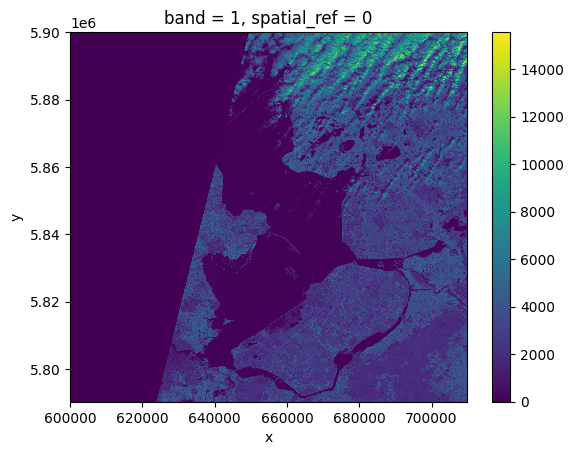

In [26]:
raster_ams_b9.plot() # easy plot of raster with coordinates

# cloudy pixels at the top have high reflectance values, telling of the fact that the wavelength 945nm is sensitive to water vapor.
# band = 1 refers to the ordering of all the bands in the DataArray.
# half the image is blank.

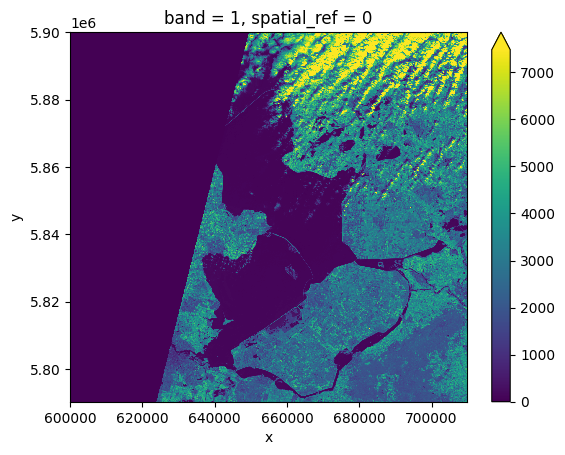

In [27]:
raster_ams_b9.plot(robust = True) # displays values betwen the 2nd and 98th percentiles.

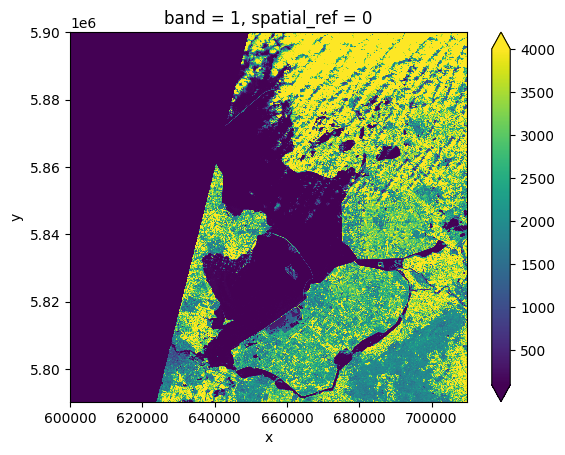

In [28]:
raster_ams_b9.plot(vmin = 100, vmax = 4000) # manuel set

### View Raster Coordinate Reference System CRS

In [29]:
print(raster_ams_b9.rio.crs.to_epsg()) # succinctly representing a particular CRS

32631


In [30]:
from pyproj import CRS

espg = raster_ams_b9.rio.crs.to_epsg()

crs = CRS(espg)

crs

<Projected CRS: EPSG:32631>
Name: WGS 84 / UTM zone 31N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 0°E and 6°E, northern hemisphere between equator and 84°N, onshore and offshore. Algeria. Andorra. Belgium. Benin. Burkina Faso. Denmark - North Sea. France. Germany - North Sea. Ghana. Luxembourg. Mali. Netherlands. Niger. Nigeria. Norway. Spain. Togo. United Kingdom (UK) - North Sea.
- bounds: (0.0, 0.0, 6.0, 84.0)
Coordinate Operation:
- name: UTM zone 31N
- method: Transverse Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [31]:
crs.area_of_use

AreaOfUse(west=0.0, south=0.0, east=6.0, north=84.0, name='Between 0°E and 6°E, northern hemisphere between equator and 84°N, onshore and offshore. Algeria. Andorra. Belgium. Benin. Burkina Faso. Denmark - North Sea. France. Germany - North Sea. Ghana. Luxembourg. Mali. Netherlands. Niger. Nigeria. Norway. Spain. Togo. United Kingdom (UK) - North Sea.')

#### Exercise: Find the access units of the CRS

Look for a method

In [32]:
dir(crs)


['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_crs',
 '_local',
 'area_of_use',
 'axis_info',
 'coordinate_operation',
 'coordinate_system',
 'cs_to_cf',
 'datum',
 'ellipsoid',
 'equals',
 'from_authority',
 'from_cf',
 'from_dict',
 'from_epsg',
 'from_json',
 'from_json_dict',
 'from_proj4',
 'from_string',
 'from_user_input',
 'from_wkt',
 'geodetic_crs',
 'get_geod',
 'is_bound',
 'is_compound',
 'is_derived',
 'is_engineering',
 'is_exact_same',
 'is_geocentric',
 'is_geographic',
 'is_projected',
 'is_vertical',
 'list_authority',
 'name',
 'prime_meridian',
 'remarks',
 'scope',
 'source_crs',
 'srs',
 'sub_crs_list',
 'targ

In [33]:
help(crs)

Help on CRS in module pyproj.crs.crs object:

class CRS(builtins.object)
 |  CRS(projparams: Optional[Any] = None, **kwargs) -> None
 |  
 |  A pythonic Coordinate Reference System manager.
 |  
 |  .. versionadded:: 2.0.0
 |  
 |  See: :c:func:`proj_create`
 |  
 |  The functionality is based on other fantastic projects:
 |  
 |  * `rasterio <https://github.com/mapbox/rasterio/blob/c13f0943b95c0eaa36ff3f620bd91107aa67b381/rasterio/_crs.pyx>`_  # noqa: E501
 |  * `opendatacube <https://github.com/opendatacube/datacube-core/blob/83bae20d2a2469a6417097168fd4ede37fd2abe5/datacube/utils/geometry/_base.py>`_  # noqa: E501
 |  
 |  Attributes
 |  ----------
 |  srs: str
 |      The string form of the user input used to create the CRS.
 |  
 |  Methods defined here:
 |  
 |  __eq__(self, other: Any) -> bool
 |      Return self==value.
 |  
 |  __getstate__(self) -> dict[str, str]
 |  
 |  __hash__(self) -> int
 |      Return hash(self).
 |  
 |  __init__(self, projparams: Optional[Any] = None

In [34]:
crs.axis_info

[Axis(name=Easting, abbrev=E, direction=east, unit_auth_code=EPSG, unit_code=9001, unit_name=metre),
 Axis(name=Northing, abbrev=N, direction=north, unit_auth_code=EPSG, unit_code=9001, unit_name=metre)]

__Answer__
- two axis'
- units are meters

### Understanding pyproj CRS Summary

In [35]:
# revisit the CRS summary
crs

<Projected CRS: EPSG:32631>
Name: WGS 84 / UTM zone 31N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 0°E and 6°E, northern hemisphere between equator and 84°N, onshore and offshore. Algeria. Andorra. Belgium. Benin. Burkina Faso. Denmark - North Sea. France. Germany - North Sea. Ghana. Luxembourg. Mali. Netherlands. Niger. Nigeria. Norway. Spain. Togo. United Kingdom (UK) - North Sea.
- bounds: (0.0, 0.0, 6.0, 84.0)
Coordinate Operation:
- name: UTM zone 31N
- method: Transverse Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

Each UTM zone has 6 degrees of longitudein width.
There are 60 zones in UTM.

### Calucate raster statistics

In [36]:
print('min: \n',raster_ams_b9.min(), '\n')
print('max: \n',raster_ams_b9.max(), '\n')
print('mean: \n',raster_ams_b9.mean(), '\n')
print('std: \n',raster_ams_b9.std(), '\n')

min: 
 <xarray.DataArray ()> Size: 2B
array(0, dtype=uint16)
Coordinates:
    spatial_ref  int64 8B 0 

max: 
 <xarray.DataArray ()> Size: 2B
array(15558, dtype=uint16)
Coordinates:
    spatial_ref  int64 8B 0 

mean: 
 <xarray.DataArray ()> Size: 8B
array(1649.83763385)
Coordinates:
    spatial_ref  int64 8B 0 

std: 
 <xarray.DataArray ()> Size: 8B
array(2053.77598092)
Coordinates:
    spatial_ref  int64 8B 0 



In [37]:
print('25th - 75th percentiles: \n', raster_ams_b9.quantile([0.25, 0.75]), '\n')

25th - 75th percentiles: 
 <xarray.DataArray (quantile: 2)> Size: 16B
array([   0., 2919.])
Coordinates:
  * quantile  (quantile) float64 16B 0.25 0.75 



In [38]:
import numpy as np

print(np.percentile(raster_ams_b9, 25))
print(np.percentile(raster_ams_b9, 75))

0.0
2919.0


In [39]:
help(raster_ams_b9.quantile)

Help on method quantile in module xarray.core.dataarray:

quantile(q: 'ArrayLike', dim: 'Dims' = None, *, method: 'QuantileMethods' = 'linear', keep_attrs: 'bool | None' = None, skipna: 'bool | None' = None, interpolation: 'QuantileMethods | None' = None) -> 'Self' method of xarray.core.dataarray.DataArray instance
    Compute the qth quantile of the data along the specified dimension.
    
    Returns the qth quantiles(s) of the array elements.
    
    Parameters
    ----------
    q : float or array-like of float
        Quantile to compute, which must be between 0 and 1 inclusive.
    dim : str or Iterable of Hashable, optional
        Dimension(s) over which to apply quantile.
    method : str, default: "linear"
        This optional parameter specifies the interpolation method to use when the
        desired quantile lies between two data points. The options sorted by their R
        type as summarized in the H&F paper [1]_ are:
    
            1. "inverted_cdf"
            2. "

### Dealing with missing data

Finding 0 in the 25th percentile and the satellite photo being blank on the left-hand side indicate missing values, which is common in raster, particularly imported with `rioxarray`. A common reason for missing values is that the sensor collecting the data flew over only some part of a defined region.

We can recode them as NaN using the bolean mask stored in the object.

In [40]:
print(raster_ams_b9.rio.nodata) # recall

0


In [41]:
# masked=True
rioxarray.open_rasterio(items[0].assets["nir09"].href, masked=True)

<xarray.DataArray (band: 1, y: 1830, x: 1830)> Size: 13MB
[3348900 values with dtype=float32]
Coordinates:
  * band         (band) int64 8B 1
  * x            (x) float64 15kB 6e+05 6.001e+05 ... 7.097e+05 7.098e+05
  * y            (y) float64 15kB 5.9e+06 5.9e+06 5.9e+06 ... 5.79e+06 5.79e+06
    spatial_ref  int64 8B 0
Attributes:
    AREA_OR_POINT:       Area
    OVR_RESAMPLING_ALG:  AVERAGE
    scale_factor:        1.0
    add_offset:          0.0

In [42]:
# where nodata
raster_ams_b9.where(raster_ams_b9!=raster_ams_b9.rio.nodata)

<xarray.DataArray (band: 1, y: 1830, x: 1830)> Size: 13MB
array([[[   nan,    nan,    nan, ..., 10061., 10200., 10172.],
        [   nan,    nan,    nan, ..., 10424., 10315.,  9763.],
        [   nan,    nan,    nan, ..., 10328., 10648., 10405.],
        ...,
        [   nan,    nan,    nan, ...,  4298.,  4343.,  4315.],
        [   nan,    nan,    nan, ...,  4284.,  4284.,  4155.],
        [   nan,    nan,    nan, ...,  3935.,  3545.,  3958.]]],
      dtype=float32)
Coordinates:
  * band         (band) int64 8B 1
  * x            (x) float64 15kB 6e+05 6.001e+05 ... 7.097e+05 7.098e+05
  * y            (y) float64 15kB 5.9e+06 5.9e+06 5.9e+06 ... 5.79e+06 5.79e+06
    spatial_ref  int64 8B 0
Attributes:
    AREA_OR_POINT:       Area
    OVR_RESAMPLING_ALG:  AVERAGE
    _FillValue:          0
    scale_factor:        1.0
    add_offset:          0.0

In [43]:
raster_ams_b9_v2 = rioxarray.open_rasterio(items[0].assets["nir09"].href, masked=True)

print('setting missing to 0 :\n', raster_ams_b9.min().values.item(),'\n')

print('setting missing to NaN :\n', raster_ams_b9_v2.min().values.item(),'\n')

setting missing to 0 :
 0 

setting missing to NaN :
 1.0 



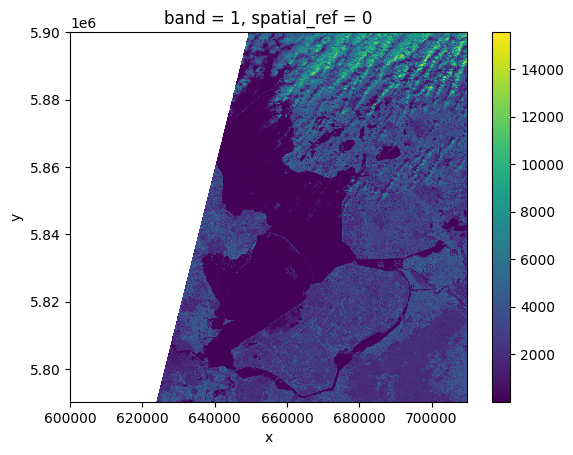

In [44]:
raster_ams_b9_v2.plot() # notice that instead of dark the missing data is now white

### Raster bands

In [45]:
items[0].assets['visual']

<Asset href=https://sentinel-cogs.s3.us-west-2.amazonaws.com/sentinel-s2-l2a-cogs/31/U/FU/2020/3/S2A_31UFU_20200328_1_L2A/TCI.tif>

In [46]:
raster_ams_overview = rioxarray.open_rasterio(items[0].assets['visual'].href, overview_level = 3)
raster_ams_overview

<xarray.DataArray (band: 3, y: 687, x: 687)> Size: 1MB
[1415907 values with dtype=uint8]
Coordinates:
  * band         (band) int64 24B 1 2 3
  * x            (x) float64 5kB 6.001e+05 6.002e+05 ... 7.096e+05 7.097e+05
  * y            (y) float64 5kB 5.9e+06 5.9e+06 5.9e+06 ... 5.79e+06 5.79e+06
    spatial_ref  int64 8B 0
Attributes:
    AREA_OR_POINT:       Area
    OVR_RESAMPLING_ALG:  AVERAGE
    _FillValue:          0
    scale_factor:        1.0
    add_offset:          0.0

__Notice__

- the xarray contains multiple dimension--band, x, y--not just two like Pandas dataframes!
- the band dimension includes three bands

In [47]:
raster_ams_overview.shape # three dimensions of different sizes! The x and y axis are balanced!

(3, 687, 687)

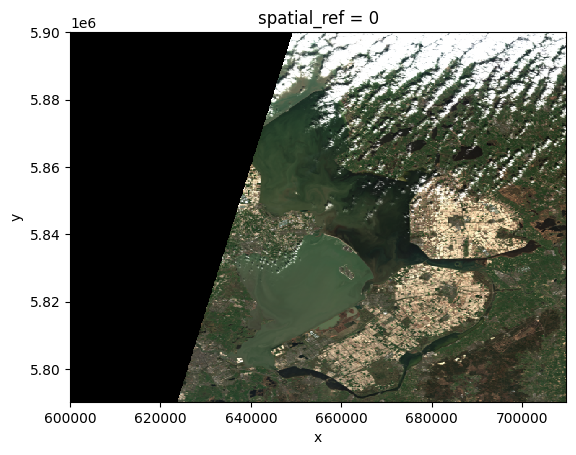

In [48]:
raster_ams_overview.plot.imshow()

`imshow()`
- assumes that three channels represent RGB color
- strecthes the proportions 

### Exercise: Set the plotting aspect ratio

Use the documentation to set the correct aspect ratio

https://docs.xarray.dev/en/stable/generated/xarray.DataArray.plot.imshow.html

In [49]:
# help(raster_ams_overview.plot.imshow())

help(raster_ams_overview.plot.imshow)

# size : scalar of height size
# aspect : auto, equal or scalar (scalar * size)

Help on method imshow in module xarray.plot.accessor:

imshow(*args: 'Any', x: 'Hashable | None' = None, y: 'Hashable | None' = None, figsize: 'Iterable[float] | None' = None, size: 'float | None' = None, aspect: 'float | None' = None, ax: 'Axes | None' = None, row: 'Hashable | None' = None, col: 'Hashable | None' = None, col_wrap: 'int | None' = None, xincrease: 'bool | None' = True, yincrease: 'bool | None' = True, add_colorbar: 'bool | None' = None, add_labels: 'bool' = True, vmin: 'float | None' = None, vmax: 'float | None' = None, cmap: 'str | Colormap | None' = None, center: 'float | Literal[False] | None' = None, robust: 'bool' = False, extend: 'ExtendOptions' = None, levels: 'ArrayLike | None' = None, infer_intervals=None, colors: 'str | ArrayLike | None' = None, subplot_kws: 'dict[str, Any] | None' = None, cbar_ax: 'Axes | None' = None, cbar_kwargs: 'dict[str, Any] | None' = None, xscale: 'ScaleOptions' = None, yscale: 'ScaleOptions' = None, xticks: 'ArrayLike | None' = None, 

In [50]:
raster_ams_overview.plot.imshow(aspect='equal') # BUG !!

ValueError: plt.imshow's `aspect` kwarg is not available in xarray

In [ ]:
raster_ams_overview.plot.imshow(size = 8, aspect = 1)


### clean space

In [ ]:
del items, raster_ams_b9, espg, crs, raster_ams_b9_v2, raster_ams_overview, item, items, 

In [ ]:
del raster_ams_b9, raster_ams_b9_v2, raster_ams_overview, item, items, 

# 7 Vector data

- use .zip and .gpkg in app/data/

### Import Vector datasets

In [52]:
import geopandas as gpd

In [104]:
geodf = gpd.read_file('../data/brpgewaspercelen_definitief_2020_small.gpkg')
geodf # dataframe of crop field parcels

category                                         gewas  gewascode  \
0      Grasland                            Grasland, blijvend        265   
1      Grasland                            Grasland, blijvend        265   
2      Grasland  Grasland, natuurlijk. Hoofdfunctie landbouw.        331   
3      Grasland  Grasland, natuurlijk. Hoofdfunctie landbouw.        331   
4      Grasland                            Grasland, blijvend        265   
...         ...                                           ...        ...   
22026  Grasland                            Grasland, blijvend        265   
22027  Grasland                            Grasland, blijvend        265   
22028  Grasland                            Grasland, blijvend        265   
22029  Bouwland                                   Maïs, snij-        259   
22030  Grasland                            Grasland, blijvend        265   

       jaar      status                                           geometry  
0      2020  Definitief  POLYGON ((117626.809 505287.535, 117622.930 50...  
1      2020  Definitief  POLYGON ((117744.449 504313.788, 117746.064 50...  
2      2020  Definitief  POLYGON ((117784.216 503525.695, 117789.021 50...  
3      2020  Definitief  POLYGON ((117903.681 504159.929, 117908.257 50...  
4      2020  Definitief  POLYGON ((118150.139 505369.637, 118168.010 50...  
...     ...         ...                                                ...  
22026  2020  Definitief  POLYGON ((139366.829 479190.018, 139391.354 47...  
22027  2020  Definitief  POLYGON ((138750.889 478528.117, 138722.478 47...  
22028  2020  Definitief  POLYGON ((139214.523 479446.287, 139104.402 47...  
22029  2020  Definitief  POLYGON ((140196.363 479281.898, 140195.206 47...  
22030  2020  Definitief  POLYGON ((139946.076 479297.442, 139941.657 47...  

[22031 rows x 6 columns]

### Subset geodf on _geometry_ dimension

In [105]:
# define bounding box

xmin, xmax = (110_000, 140_000)
ymin, ymax = (470_000, 510_000)
bbox = (xmin, xmax, ymin, ymax)
bbox

(110000, 140000, 470000, 510000)

In [106]:
geodf_bb = gpd.read_file('../data/brpgewaspercelen_definitief_2020_small.gpkg', bbox = bbox)
geodf_bb

category                                         gewas  gewascode  \
0      Bouwland                                 Gerst, zomer-        236   
1      Bouwland                                   Maïs, snij-        259   
2      Grasland                            Grasland, blijvend        265   
3      Grasland                            Grasland, blijvend        265   
4      Grasland                            Grasland, blijvend        265   
...         ...                                           ...        ...   
22026  Grasland  Grasland, natuurlijk. Hoofdfunctie landbouw.        331   
22027  Grasland  Grasland, natuurlijk. Hoofdfunctie landbouw.        331   
22028  Grasland                            Grasland, blijvend        265   
22029  Grasland  Grasland, natuurlijk. Hoofdfunctie landbouw.        331   
22030  Grasland  Grasland, natuurlijk. Hoofdfunctie landbouw.        331   

       jaar      status                                           geometry  
0      2020  Definitief  POLYGON ((112701.927 469461.513, 112742.745 46...  
1      2020  Definitief  POLYGON ((112894.273 469539.714, 112899.962 46...  
2      2020  Definitief  POLYGON ((112714.585 469792.879, 112746.317 46...  
3      2020  Definitief  POLYGON ((112477.552 469951.205, 112496.172 46...  
4      2020  Definitief  POLYGON ((112384.744 469953.238, 112405.630 46...  
...     ...         ...                                                ...  
22026  2020  Definitief  POLYGON ((133371.140 492631.152, 133379.924 49...  
22027  2020  Definitief  POLYGON ((133422.246 492887.057, 133426.347 49...  
22028  2020  Definitief  POLYGON ((133554.659 492738.186, 133587.600 49...  
22029  2020  Definitief  POLYGON ((133434.981 492748.790, 133481.442 49...  
22030  2020  Definitief  POLYGON ((133361.772 492537.069, 133367.624 49...  

[22031 rows x 6 columns]

- _Notice the change in the POLOGONs_
- The geometry column is represented by a `shapely.geometry.Polygon`

<Axes: >

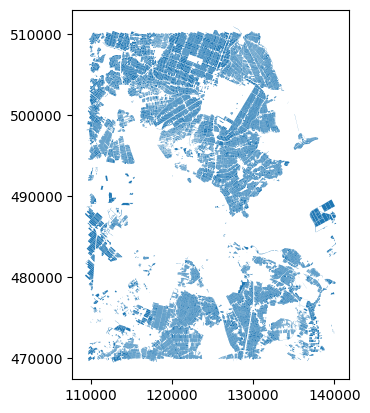

In [56]:
geodf_bb.plot()

### Vector Metadata & Attributes

In [57]:
geodf_bb.type # geometry type

0        Polygon
1        Polygon
2        Polygon
3        Polygon
4        Polygon
          ...   
22026    Polygon
22027    Polygon
22028    Polygon
22029    Polygon
22030    Polygon
Length: 22031, dtype: object

In [58]:
geodf_bb.crs # Coordinate Reference System

<Projected CRS: EPSG:28992>
Name: Amersfoort / RD New
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: Netherlands - onshore, including Waddenzee, Dutch Wadden Islands and 12-mile offshore coastal zone.
- bounds: (3.2, 50.75, 7.22, 53.7)
Coordinate Operation:
- name: RD New
- method: Oblique Stereographic
Datum: Amersfoort
- Ellipsoid: Bessel 1841
- Prime Meridian: Greenwich

- The CRS "RD New" specifies the units of the 'extent' values, which makes this critical to interpretation!

In [59]:
geodf_bb.total_bounds # extent - geographic area covered

array([109222.03325 , 469461.512625, 140295.122125, 510939.997875])

- minx, miny, maxx, maxy

In [60]:
bbox

(110000, 140000, 470000, 510000)

- xmin, xmax, ymin, ymax

- Notice the different rankorder of the min/max values of x and y in total_bounds and our bbox, respectively:
  - The empirical min values are smaller than the set min criteria.
    - 110000 > 109222
    - 470000 > 469461
  - The empirical max values are larger than the set max criteria.
    - 140000 < 140295
    - 510000 < 510939

### Further crop the dataset

In [107]:
xmin, xmax = (120_000, 135_000)
ymin, ymax = (485_000, 500_000)
geodf_bb2 = geodf_bb.cx[xmin:xmax, ymin:ymax]
geodf_bb2

category                                         gewas  gewascode  \
870    Grasland                            Grasland, blijvend        265   
871    Grasland                            Grasland, blijvend        265   
872    Grasland                            Grasland, blijvend        265   
873    Grasland                            Grasland, blijvend        265   
874    Grasland  Grasland, natuurlijk. Hoofdfunctie landbouw.        331   
...         ...                                           ...        ...   
22026  Grasland  Grasland, natuurlijk. Hoofdfunctie landbouw.        331   
22027  Grasland  Grasland, natuurlijk. Hoofdfunctie landbouw.        331   
22028  Grasland                            Grasland, blijvend        265   
22029  Grasland  Grasland, natuurlijk. Hoofdfunctie landbouw.        331   
22030  Grasland  Grasland, natuurlijk. Hoofdfunctie landbouw.        331   

       jaar      status                                           geometry  
870    2020  Definitief  POLYGON ((120154.932 495930.341, 120159.250 49...  
871    2020  Definitief  POLYGON ((120101.483 496378.781, 120102.674 49...  
872    2020  Definitief  POLYGON ((119858.185 496057.345, 119859.714 49...  
873    2020  Definitief  POLYGON ((120168.354 496651.174, 120168.535 49...  
874    2020  Definitief  POLYGON ((119944.018 496061.229, 119949.971 49...  
...     ...         ...                                                ...  
22026  2020  Definitief  POLYGON ((133371.140 492631.152, 133379.924 49...  
22027  2020  Definitief  POLYGON ((133422.246 492887.057, 133426.347 49...  
22028  2020  Definitief  POLYGON ((133554.659 492738.186, 133587.600 49...  
22029  2020  Definitief  POLYGON ((133434.981 492748.790, 133481.442 49...  
22030  2020  Definitief  POLYGON ((133361.772 492537.069, 133367.624 49...  

[4872 rows x 6 columns]

### Export to file

In [62]:
geodf_bb2.to_file('../data/geodf_bb2.shp')

Note that this actually writes multiple files to disk (fields_cropped.cpg, fields_cropped.dbf, fields_cropped.prj, fields_cropped.shp, fields_cropped.shx). All these files should ideally be present in order to re-read the dataset later, although only the .shp, .shx, and .dbf files are mandatory

### Selecting spatial features

In [108]:
# geodf_bb2 = gpd.read_file('../data/geodf_bb2.shp') # already in memory
fields = geodf_bb2
!unzip -l ../data/brogmwvolledigeset.zip # there's a .gpkg file
wells = gpd.read_file('../data/brogmwvolledigeset.zip')

In [64]:
fields

category                                         gewas  gewascode  \
870    Grasland                            Grasland, blijvend        265   
871    Grasland                            Grasland, blijvend        265   
872    Grasland                            Grasland, blijvend        265   
873    Grasland                            Grasland, blijvend        265   
874    Grasland  Grasland, natuurlijk. Hoofdfunctie landbouw.        331   
...         ...                                           ...        ...   
22026  Grasland  Grasland, natuurlijk. Hoofdfunctie landbouw.        331   
22027  Grasland  Grasland, natuurlijk. Hoofdfunctie landbouw.        331   
22028  Grasland                            Grasland, blijvend        265   
22029  Grasland  Grasland, natuurlijk. Hoofdfunctie landbouw.        331   
22030  Grasland  Grasland, natuurlijk. Hoofdfunctie landbouw.        331   

       jaar      status                                           geometry  
870    2020  Definitief  POLYGON ((120154.932 495930.341, 120159.250 49...  
871    2020  Definitief  POLYGON ((120101.483 496378.781, 120102.674 49...  
872    2020  Definitief  POLYGON ((119858.185 496057.345, 119859.714 49...  
873    2020  Definitief  POLYGON ((120168.354 496651.174, 120168.535 49...  
874    2020  Definitief  POLYGON ((119944.018 496061.229, 119949.971 49...  
...     ...         ...                                                ...  
22026  2020  Definitief  POLYGON ((133371.140 492631.152, 133379.924 49...  
22027  2020  Definitief  POLYGON ((133422.246 492887.057, 133426.347 49...  
22028  2020  Definitief  POLYGON ((133554.659 492738.186, 133587.600 49...  
22029  2020  Definitief  POLYGON ((133434.981 492748.790, 133481.442 49...  
22030  2020  Definitief  POLYGON ((133361.772 492537.069, 133367.624 49...  

[4872 rows x 6 columns]

In [65]:
wells

bro_id delivery_accountable_party quality_regime  \
0      GMW000000003627                   01182779        IMBRO/A   
1      GMW000000003637                   01182779        IMBRO/A   
2      GMW000000003647                   01182779        IMBRO/A   
3      GMW000000003657                   01182779        IMBRO/A   
4      GMW000000003667                   01182779        IMBRO/A   
...                ...                        ...            ...   
54654  GMW000000061413                   50788590          IMBRO   
54655  GMW000000061414                   50788590          IMBRO   
54656  GMW000000061415                   50788590          IMBRO   
54657  GMW000000061416                   09220971          IMBRO   
54658  GMW000000061417                   09220971          IMBRO   

      with_prehistory   delivery_context construction_standard  \
0                  ja  archiefoverdracht              onbekend   
1                  ja  archiefoverdracht              onbekend   
2                  ja  archiefoverdracht              onbekend   
3                  ja  archiefoverdracht              onbekend   
4                  ja  archiefoverdracht              onbekend   
...               ...                ...                   ...   
54654             nee                 WW             STOWAgwst   
54655             nee                 WW             STOWAgwst   
54656             nee                 WW             STOWAgwst   
54657             nee       publiekeTaak                  geen   
54658             nee       publiekeTaak                  geen   

      initial_function removed  number_of_monitoring_tubes groundlevel_stable  \
0                stand     nee                         1.0           onbekend   
1                stand     nee                         1.0           onbekend   
2                stand     nee                         1.0           onbekend   
3                stand     nee                         2.0           onbekend   
4                stand     nee                         1.0           onbekend   
...                ...     ...                         ...                ...   
54654            stand     nee                         1.0                 ja   
54655            stand     nee                         1.0                 ja   
54656            stand     nee                         1.0                 ja   
54657            stand     nee                         1.0                 ja   
54658            stand     nee                         1.0                 ja   

       ... corrected latest_correction_time under_review under_review_time  \
0      ...       nee                   None          nee              None   
1      ...       nee                   None          nee              None   
2      ...       nee                   None          nee              None   
3      ...       nee                   None          nee              None   
4      ...       nee                   None          nee              None   
...    ...       ...                    ...          ...               ...   
54654  ...       nee                   None          nee              None   
54655  ...       nee                   None          nee              None   
54656  ...       nee                   None          nee              None   
54657  ...       nee                   None          nee              None   
54658  ...       nee                   None          nee              None   

      deregistered deregistration_time reregistered reregistration_time  \
0              nee                None          nee                None   
1              nee                None          nee                None   
2              nee                None          nee                None   
3              nee                None          nee                None   
4              nee                None          nee                None   
...            ...                 ...        

In [109]:
del geodf_bb2, geodf_bb, geodf

In [67]:
fields.crs

<Projected CRS: EPSG:28992>
Name: Amersfoort / RD New
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: Netherlands - onshore, including Waddenzee, Dutch Wadden Islands and 12-mile offshore coastal zone.
- bounds: (3.2, 50.75, 7.22, 53.7)
Coordinate Operation:
- name: RD New
- method: Oblique Stereographic
Datum: Amersfoort
- Ellipsoid: Bessel 1841
- Prime Meridian: Greenwich

<Axes: >

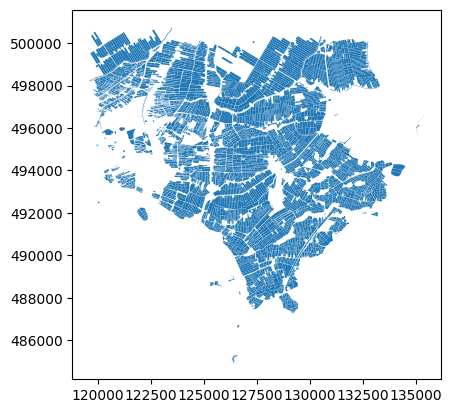

In [68]:
fields.plot()

<Axes: >

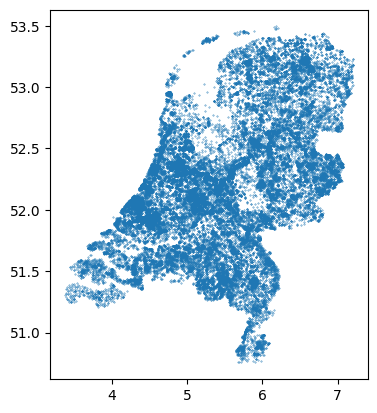

In [69]:
wells.plot(markersize = 0.1)

<Axes: >

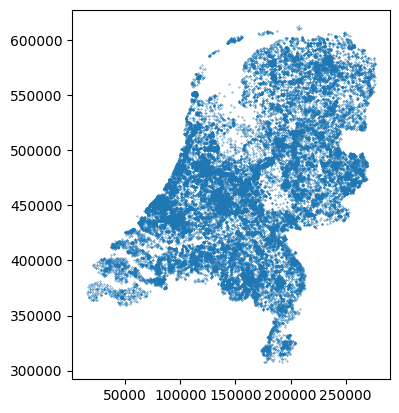

In [70]:
wells = wells.to_crs(epsg = 28992) # transfer points from lat/lon to CRS noted above
wells.plot(markersize = 0.1)

In [71]:
wells_clip = wells.clip(fields) # select wells within fields
wells_clip

bro_id delivery_accountable_party quality_regime  \
19445  GMW000000024992                   50200097        IMBRO/A   
40174  GMW000000043963                   27364178        IMBRO/A   
40261  GMW000000043771                   27364178        IMBRO/A   
40150  GMW000000043753                   27364178        IMBRO/A   
40032  GMW000000045203                   27364178        IMBRO/A   
...                ...                        ...            ...   
38624  GMW000000045994                   27364178        IMBRO/A   
39248  GMW000000044430                   27364178        IMBRO/A   
40422  GMW000000044026                   27364178        IMBRO/A   
38779  GMW000000045404                   27364178        IMBRO/A   
16926  GMW000000025310                   50200097        IMBRO/A   

      with_prehistory   delivery_context construction_standard  \
19445              ja  archiefoverdracht              onbekend   
40174              ja  archiefoverdracht              onbekend   
40261              ja  archiefoverdracht              onbekend   
40150              ja  archiefoverdracht              onbekend   
40032              ja  archiefoverdracht              onbekend   
...               ...                ...                   ...   
38624              ja  archiefoverdracht              onbekend   
39248              ja  archiefoverdracht              onbekend   
40422              ja  archiefoverdracht              onbekend   
38779              ja  archiefoverdracht              onbekend   
16926              ja  archiefoverdracht              onbekend   

      initial_function removed  number_of_monitoring_tubes groundlevel_stable  \
19445            stand     nee                         1.0                 ja   
40174            stand     nee                         1.0                nee   
40261            stand      ja                         1.0                nee   
40150            stand      ja                         1.0                nee   
40032            stand      ja                         1.0                nee   
...                ...     ...                         ...                ...   
38624            stand      ja                         1.0                nee   
39248            stand      ja                         1.0                nee   
40422            stand      ja                         1.0                 ja   
38779            stand     nee                         1.0                 ja   
16926            stand     nee                         1.0                 ja   

       ... corrected latest_correction_time under_review under_review_time  \
19445  ...       nee                   None          nee              None   
40174  ...       nee                   None          nee              None   
40261  ...       nee                   None          nee              None   
40150  ...       nee                   None          nee              None   
40032  ...       nee                   None          nee              None   
...    ...       ...                    ...          ...               ...   
38624  ...       nee                   None          nee              None   
39248  ...       nee                   None          nee              None   
40422  ...       nee                   None          nee              None   
38779  ...       nee                   None          nee              None   
16926  ...       nee                   None          nee              None   

      deregistered deregistration_time reregistered reregistration_time  \
19445          nee                None          nee                None   
40174          nee                None          nee                None   
40261          nee                None          nee                None   
40150          nee                None          nee                None   
40032          nee                None          nee                None   
...            ...                 ...        

<Axes: >

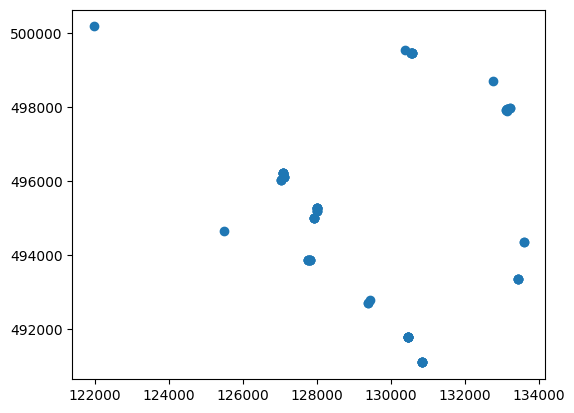

In [72]:
wells_clip.plot()

- clearly this selection is very precise
- we want more wells in the periphery of the fields


<Axes: >

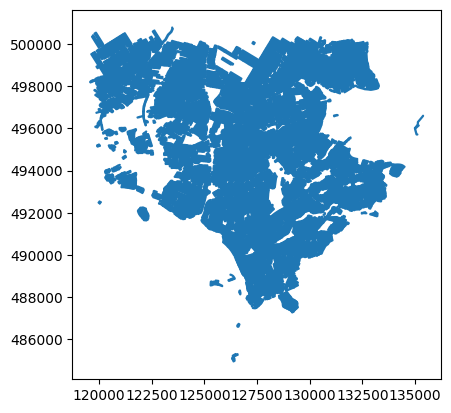

In [73]:
buffer = fields.buffer(50) # 50m buffer zone
fields_buffer = fields.copy()
fields_buffer['geometry'] = buffer # subsets the fields in buffer zone
fields_buffer.plot()

In [74]:
fields_buffer_dissolve = fields_buffer.dissolve() # dissolve into one multi-polygon
fields_buffer_dissolve

geometry  category  \
0  MULTIPOLYGON (((120037.937 492388.957, 120033....  Grasland   

                gewas  gewascode  jaar      status  
0  Grasland, blijvend        265  2020  Definitief

<Axes: >

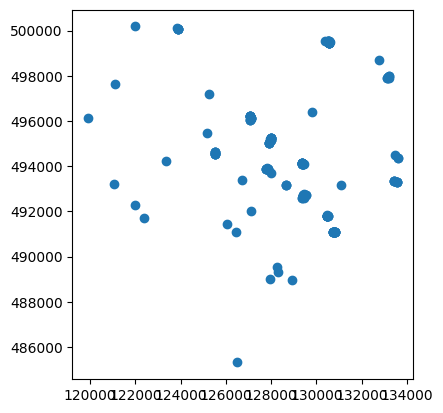

In [75]:
wells_clip_buffer = wells.clip(fields_buffer_dissolve)
wells_clip_buffer.plot()

- selected wells within the 50m range of the fields
- faster than the clip operation given the smaller number of polygons after dissolve

#### Exercise: Clip fields within 500m from wells

1. wells are in CRS 4326. convert fields to that
2. crop wells (all wells in NL) using bounding box applied to fields

In [125]:
# AD Hints 1.

# wells = wells.to_crs(crs = 4326)
# fields_crs = fields.to_crs(crs = 4326)

# misunderstood. the fields we already converted!!
#wells = wells.to_crs(crs = 28992)
#fields = fields.to_crs(crs = 28992)


In [127]:
# check CRS conversion
print(wells.crs)
print(wells.crs.area_of_use.bounds) # bbox
print(wells.total_bounds)

print(fields.crs)
print(fields.crs.area_of_use.bounds) # bbox
print(fields.total_bounds)


EPSG:28992
(3.2, 50.75, 7.22, 53.7)
[ 15030.20755878 307372.8497259  276857.97154928 612340.05417362]
EPSG:28992
(3.2, 50.75, 7.22, 53.7)
[119594.384    484949.292625 135375.77025  500782.531   ]


fields_clip = fields.clip(wells) # high precision with no buffer
fields_clip.plot() # 

In [136]:
#  AD Hints 2.
# wells.buffer(500) # works - what's the problem?

# lets crop anyway
xmin, ymin, xmax, ymax = fields.total_bounds
wells_bb = wells.cx[xmin-500:xmax+500, ymin-500:ymax+500] # subset with bbox mask plus minus 500m
wells_bb['geometry'] # check

1136     POINT (122727.188 492431.740)
1220     POINT (122632.429 492566.311)
1256     POINT (122598.108 492366.141)
1280     POINT (122550.418 492400.260)
1375     POINT (122570.758 492333.910)
                     ...              
53325    POINT (123534.941 490080.013)
53443    POINT (121003.951 487189.012)
53444    POINT (122388.850 485440.209)
53449    POINT (129747.526 485211.114)
53450    POINT (129577.026 485243.714)
Name: geometry, Length: 2264, dtype: geometry

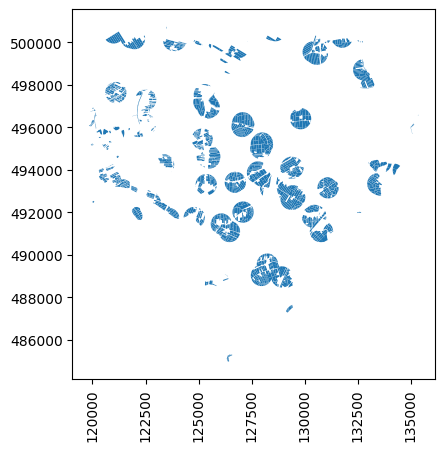

In [147]:
import matplotlib.pyplot as plt

# 500m buffer zone
wells_bb_buffer = wells_bb.copy()
wells_bb_buffer['geometry'] = wells_bb.buffer(500) # subsets the fields in buffer zone

# dissolve
wells_bb_buffer_dissolve = wells_bb_buffer.dissolve() # dissolve into one multi-polygon

# clip by dissolve
wells_clip2 = fields.clip(wells_bb_buffer_dissolve)
plot = wells_clip2.plot() 
plt.xticks(rotation = 90)
plt.show()


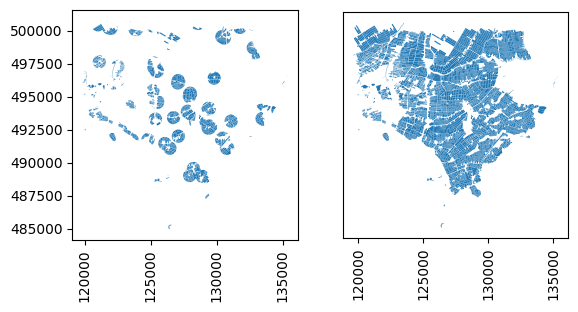

In [154]:

fig, axes = plt.subplots(1,2)
wells_clip2.plot(ax=axes[0])
fields.plot(ax=axes[1])
for ax in axes:
    ax.tick_params(axis='x', rotation=90)

axes[1].set_yticks([])
fig.show()

### Spatially join the features

In [171]:
fields_wells_buffer = fields.sjoin(wells_bb_buffer) # all possible combinations of polygons and well buffers intersecting with each other. Hence duplicates!
print(fields_wells_buffer.shape)
print('Unique indices in join:\n', fields_wells_buffer.index.nunique())
print('Unique indices in fields:\n', fields.index.nunique())

(11419, 46)
Unique indices in join:
 1720
Unique indices in fields:
 4872


<Axes: >

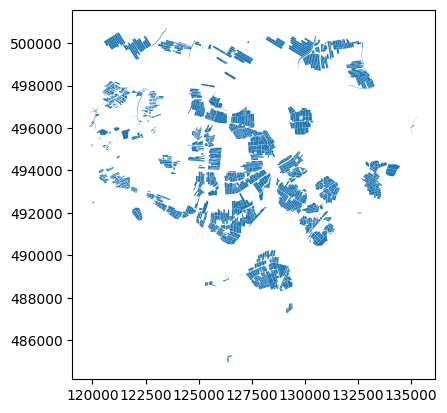

In [172]:
idx = fields_wells_buffer.index.unique()
fields_in_buffer = fields.loc[idx]
fields_in_buffer.plot() # keeps the shape of the field polygons (not 500m radius centered around wells). i.e. keep the whole field

### Modify the geometry of a GeoDataFrame

### Exercise: Investigate the waterway lines

- Dutch waterway lines in `status_vaarweg.zip` > waterways_nl
- what is wrong with the vector file?

In [9]:
# let's check the content
!unzip -l ../data/status_vaarweg.zip # .shp

Archive:  ../data/status_vaarweg.zip
  Length      Date    Time    Name
---------  ---------- -----   ----
       10  2022-10-05 01:13   status_vaarweg.cst
      828  2022-10-05 01:13   status_vaarweg.shx
   190828  2022-10-05 01:13   status_vaarweg.shp
   157210  2022-10-05 01:13   status_vaarweg.dbf
      161  2022-10-05 01:13   wfsrequest.txt
      335  2022-10-05 01:13   status_vaarweg.prj
---------                     -------
   349372                     6 files


<Axes: >

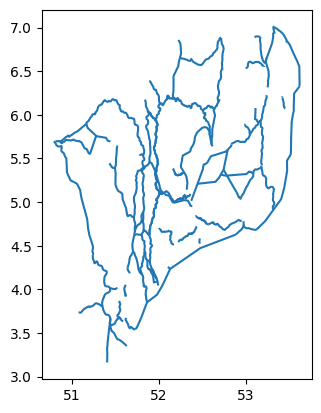

In [15]:
import geopandas as gpd
waterway_nl = gpd.read_file('../data/status_vaarweg.zip')
waterway_nl.plot() # knowing from the initial plot of the wells, the axis of the waterways appear flipped

In [19]:
waterway_nl.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [18]:
waterway_nl.total_bounds

array([50.7916,  3.1626, 53.6161,  7.0121])

- The CRS EPSG 4326 defines axis ordering as first latitude then longitude.
- GIS, like `geopandas`, customarily operates with coordinate tuples (x,x,x,x...) aligning the first component with east/west direction and the second component with north/south direction.
- This means the data are interpreted incorrectly!

### Modify axis ordering

In [30]:
waterway_nl['geometry'] # https://shapely.readthedocs.io/en/stable/reference/shapely.LineString.html

0     LINESTRING (52.41810 4.84060, 52.42070 4.84090...
1     LINESTRING (52.11910 4.67450, 52.11930 4.67340...
2     LINESTRING (52.10090 4.25730, 52.10390 4.25530...
3     LINESTRING (53.47250 6.84550, 53.47740 6.83840...
4     LINESTRING (52.32270 5.14300, 52.32100 5.14640...
                            ...                        
86    LINESTRING (51.49270 5.39100, 51.48050 5.39160...
87    LINESTRING (52.15900 5.38510, 52.16010 5.38340...
88    LINESTRING (51.97340 4.12420, 51.97110 4.12220...
89    LINESTRING (52.11910 4.67450, 52.11850 4.67430...
90    LINESTRING (51.88940 4.61900, 51.89040 4.61350...
Name: geometry, Length: 91, dtype: geometry

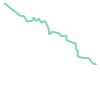

In [63]:
waterway_nl['geometry'][0] # plot the first linestring element

In [110]:
import shapely

waterway_nl['geometry'][0].coords[:] # all coordinates of the first linestring

[(52.418099999, 4.84059999900001),
 (52.420699999, 4.84089999999998),
 (52.4219, 4.840300001),
 (52.422899999, 4.83900000199998),
 (52.426899999, 4.83529999899997),
 (52.4278, 4.83439999799998),
 (52.431200001, 4.83210000000003),
 (52.431699999, 4.831700001),
 (52.4355, 4.82869999899998),
 (52.4366, 4.8279),
 (52.4388, 4.82629999900001),
 (52.440499999, 4.82470000199999),
 (52.441, 4.824299999),
 (52.4461, 4.8211),
 (52.447500002, 4.82070000099998),
 (52.4494, 4.821199998),
 (52.450599998, 4.82059999900002),
 (52.4518, 4.81909999999999),
 (52.454500001, 4.813499998),
 (52.454999998, 4.81270000000001),
 (52.455699999, 4.81219999899997),
 (52.457699999, 4.81260000200001),
 (52.459100001, 4.81289999900002),
 (52.460999999, 4.81280000100003),
 (52.463, 4.81260000200001),
 (52.4639, 4.81360000000001),
 (52.465100002, 4.816300001),
 (52.465599999, 4.817299999),
 (52.466200002, 4.81799999999998),
 (52.466699999, 4.81819999999999),
 (52.4672, 4.81779999999998),
 (52.467599999, 4.81700000199999

In [97]:
# the x coordinates of the first linestring
waterway_nl['geometry'][0].xy[0]

array('d', [52.418099999, 52.420699999, 52.4219, 52.422899999, 52.426899999, 52.4278, 52.431200001, 52.431699999, 52.4355, 52.4366, 52.4388, 52.440499999, 52.441, 52.4461, 52.447500002, 52.4494, 52.450599998, 52.4518, 52.454500001, 52.454999998, 52.455699999, 52.457699999, 52.459100001, 52.460999999, 52.463, 52.4639, 52.465100002, 52.465599999, 52.466200002, 52.466699999, 52.4672, 52.467599999, 52.468699999, 52.469300002, 52.4703, 52.471000001, 52.4716, 52.4727, 52.473299999, 52.474800002, 52.475099999, 52.475499999, 52.475900002, 52.476599999, 52.477699999, 52.4789, 52.479699999, 52.4804, 52.4811, 52.482500002, 52.483800001, 52.485100001, 52.485599998, 52.486299999, 52.4868, 52.489, 52.489300001, 52.489700001, 52.4899, 52.4903, 52.491099998, 52.4912, 52.4914, 52.4914, 52.491300002, 52.491, 52.491, 52.491099998, 52.491500001, 52.491999999, 52.492600001, 52.493999999, 52.494800001, 52.4954, 52.4956, 52.495900001, 52.496100001, 52.496300001, 52.497200001, 52.497699998, 52.499299999, 52.5

In [103]:
# use list comprehension to flip the xy coordinates of the first linestring
[(y, x) for x, y in waterway_nl['geometry'][0].coords]

[(4.84059999900001, 52.418099999),
 (4.84089999999998, 52.420699999),
 (4.840300001, 52.4219),
 (4.83900000199998, 52.422899999),
 (4.83529999899997, 52.426899999),
 (4.83439999799998, 52.4278),
 (4.83210000000003, 52.431200001),
 (4.831700001, 52.431699999),
 (4.82869999899998, 52.4355),
 (4.8279, 52.4366),
 (4.82629999900001, 52.4388),
 (4.82470000199999, 52.440499999),
 (4.824299999, 52.441),
 (4.8211, 52.4461),
 (4.82070000099998, 52.447500002),
 (4.821199998, 52.4494),
 (4.82059999900002, 52.450599998),
 (4.81909999999999, 52.4518),
 (4.813499998, 52.454500001),
 (4.81270000000001, 52.454999998),
 (4.81219999899997, 52.455699999),
 (4.81260000200001, 52.457699999),
 (4.81289999900002, 52.459100001),
 (4.81280000100003, 52.460999999),
 (4.81260000200001, 52.463),
 (4.81360000000001, 52.4639),
 (4.816300001, 52.465100002),
 (4.817299999, 52.465599999),
 (4.81799999999998, 52.466200002),
 (4.81819999999999, 52.466699999),
 (4.81779999999998, 52.4672),
 (4.81700000199999, 52.467599999

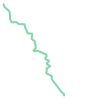

In [113]:
# wrap the outcome in a LineString
shapely.geometry.LineString([(y, x) for x, y in waterway_nl['geometry'][0].coords])

<Axes: >

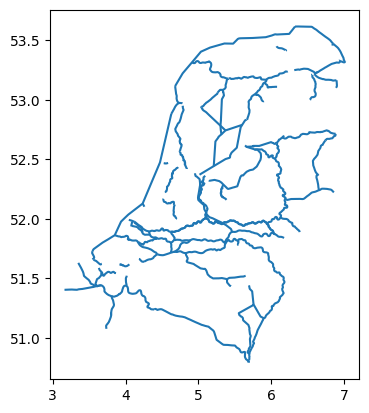

In [121]:
# apply the list comprehension to all linestrings by piping them to lambda 
waterway_nl['geometry'].apply(lambda linestrings: shapely.geometry.LineString([(y, x) for x, y in linestrings.coords])).plot()

<Axes: >

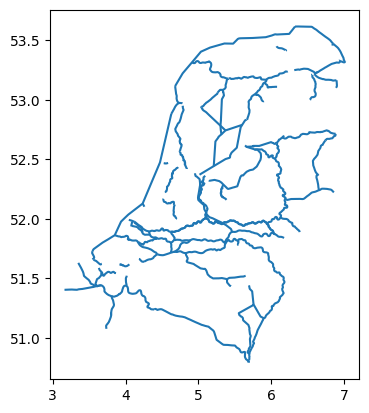

In [128]:
# don't use apply lambda methods

sgLS = shapely.geometry.LineString

waterway_nl['geometry'] = [sgLS([(y, x) for x, y in linestring.coords]) for linestring in waterway_nl['geometry']]
waterway_nl.plot()

- this solves the problem but is a little involved.
- the lesson suggests a function which is shorter!

In [35]:
help(shapely.ops.transform) # # https://shapely.readthedocs.io/en/stable/manual.html#other-transformations

Help on function transform in module shapely.ops:

transform(func, geom)
    Applies `func` to all coordinates of `geom` and returns a new
    geometry of the same type from the transformed coordinates.
    
    `func` maps x, y, and optionally z to output xp, yp, zp. The input
    parameters may iterable types like lists or arrays or single values.
    The output shall be of the same type. Scalars in, scalars out.
    Lists in, lists out.
    
    For example, here is an identity function applicable to both types
    of input.
    
      def id_func(x, y, z=None):
          return tuple(filter(None, [x, y, z]))
    
      g2 = transform(id_func, g1)
    
    Using pyproj >= 2.1, this example will accurately project Shapely geometries:
    
      import pyproj
    
      wgs84 = pyproj.CRS('EPSG:4326')
      utm = pyproj.CRS('EPSG:32618')
    
      project = pyproj.Transformer.from_crs(wgs84, utm, always_xy=True).transform
    
      g2 = transform(project, g1)
    
    Note that the 

<Axes: >

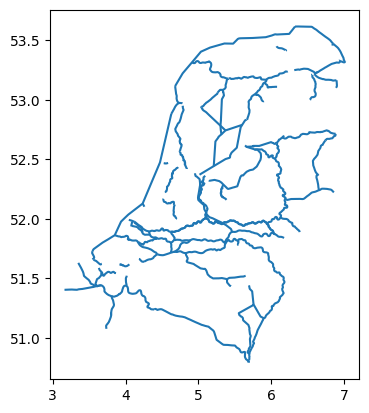

In [122]:
def flip(geometry):
    return shapely.ops.transform(lambda x, y: (y, x), geometry)

waterway_nl['geometry'] = waterway_nl['geometry'].apply(flip)
waterway_nl.plot()

In [131]:
# let's test performance
import timeit

m1 = """waterway_nl['geometry'] = waterway_nl['geometry'].apply(flip)"""
m2 = """waterway_nl['geometry'] = [sgLS([(y, x) for x, y in linestring.coords]) for linestring in waterway_nl['geometry']]"""

# Time method 1
time1 = timeit.timeit(stmt=m1, globals=globals(), number=1)

# Time method 2
time2 = timeit.timeit(stmt=m2, globals=globals(), number=1)

print("Time for method 1:", time1)
print("Time for method 2:", time2)

Time for method 1: 0.03752155899928766
Time for method 2: 0.022241022999878624


- _List comprehension, while more involved, is faster_

<Axes: >

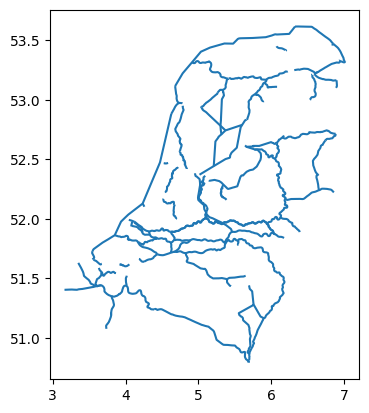

In [132]:
waterway_nl.plot()

In [134]:
waterway_nl.to_file('../data/waterways_nl_corrected.shp')

### clean space

In [ ]:
del fields_wells_buffer, waterway_nl, m1, m2, time1, time2, sgLS

# 8. Crop raster data with rioxarray

- use lesson 5 `search.json`
- crop raster to area of interest

### Align the CRS of the raster and the vector data

In [29]:
import pystac
import rioxarray

items = pystac.ItemCollection.from_file("../data/search.json")
items2 = pystac.ItemCollection.from_file("../data/geospatial-python-raster-dataset/search.json")
raster = rioxarray.open_rasterio(items[1].assets["visual"].href) # visual means true color img
raster2 = rioxarray.open_rasterio(items[1].assets["visual"].href)
raster.shape

(3, 10980, 10980)

In [2]:
# access 'overview'; a precomputed lower resolution representation of a raster

raster_overview = rioxarray.open_rasterio(items[1].assets["visual"].href, overview_level = 3)
raster_overview.shape

(3, 687, 687)

- the number of pixels is clearly lower in the overview than in the image

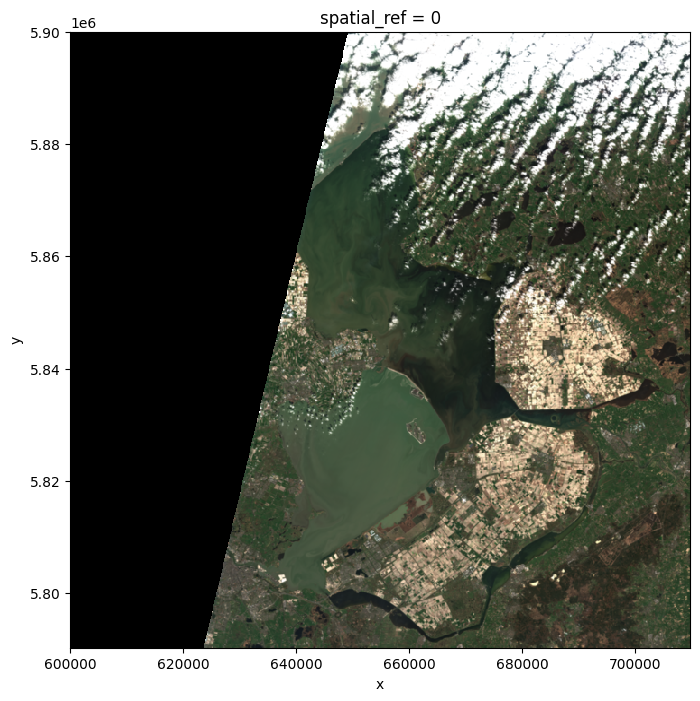

In [4]:
raster_overview.plot.imshow(size = 8, aspect = 1) # figsize = (8, 8)

In [6]:
from pyproj import CRS

CRS(raster.rio.crs) # check coordinate system of raster

<Projected CRS: EPSG:32631>
Name: WGS 84 / UTM zone 31N
Axis Info [cartesian]:
- [east]: Easting (metre)
- [north]: Northing (metre)
Area of Use:
- undefined
Coordinate Operation:
- name: UTM zone 31N
- method: Transverse Mercator
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [8]:
import geopandas as gpd

fields = gpd.read_file("../data/geodf_bb2.shp")

fields.crs # check coordinate system of vector

<Projected CRS: EPSG:28992>
Name: Amersfoort / RD New
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: Netherlands - onshore, including Waddenzee, Dutch Wadden Islands and 12-mile offshore coastal zone.
- bounds: (3.2, 50.75, 7.22, 53.7)
Coordinate Operation:
- name: RD New
- method: Oblique Stereographic
Datum: Amersfoort
- Ellipsoid: Bessel 1841
- Prime Meridian: Greenwich


| | raster | vector |
|-|--------|--------|
| __CRS EPSG__ | 32631 | 28992 |
|__Coordinate Operation name__|UTM zone 31 N|RD New|
|__Coordinate Operation method__|Transverse Mercator|Oblique Stereographic|



In [30]:
# reproject vector CRS to raster CRS because the latter is larger, avoiding loading the entire image

fields = fields.to_crs(raster.rio.crs)
fields2 = fields.to_crs(raster2.rio.crs)

### Crop raster data with a __bounding box__

In [27]:
print('fields bbox:',fields.total_bounds, '\n')
help(raster.rio.clip_box) # takes four arguments

fields bbox: [ 626758.92477826 5801978.3252512   642583.33625691 5817705.26052954] 

Help on method clip_box in module rioxarray.raster_array:

clip_box(minx: float, miny: float, maxx: float, maxy: float, auto_expand: Union[bool, int] = False, auto_expand_limit: int = 3, crs: Optional[Any] = None) -> xarray.core.dataarray.DataArray method of rioxarray.raster_array.RasterArray instance
    Clip the :obj:`xarray.DataArray` by a bounding box.
    
    .. versionadded:: 0.12 crs
    
    Parameters
    ----------
    minx: float
        Minimum bound for x coordinate.
    miny: float
        Minimum bound for y coordinate.
    maxx: float
        Maximum bound for x coordinate.
    maxy: float
        Maximum bound for y coordinate.
    auto_expand: Union[bool, int]
        If True, it will expand clip search if only 1D raster found with clip.
    auto_expand_limit: int
        maximum number of times the clip will be retried before raising
        an exception.
    crs: :obj:`rasterio.crs

In [31]:
raster_clip_box = raster.rio.clip_box(*fields.total_bounds) # splatting/unpacking: * gives all four total_bounds as position arguments to clip_box()
raster_clip_box2 = raster2.rio.clip_box(*fields2.total_bounds)
raster_clip_box.shape

(3, 1574, 1584)

- clearly less pixels than the full img, but also larger than the overview

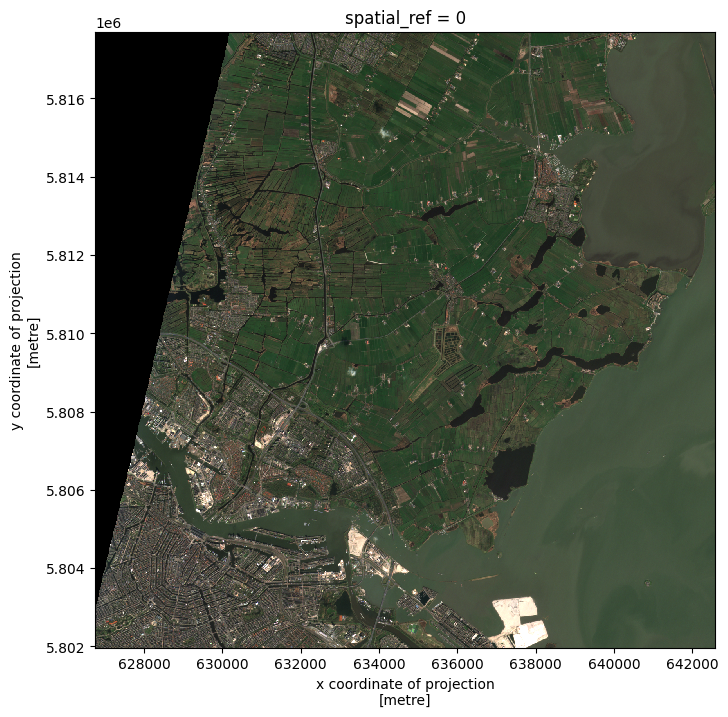

In [28]:
raster_clip_box.plot.imshow(size = 8, aspect = 1)

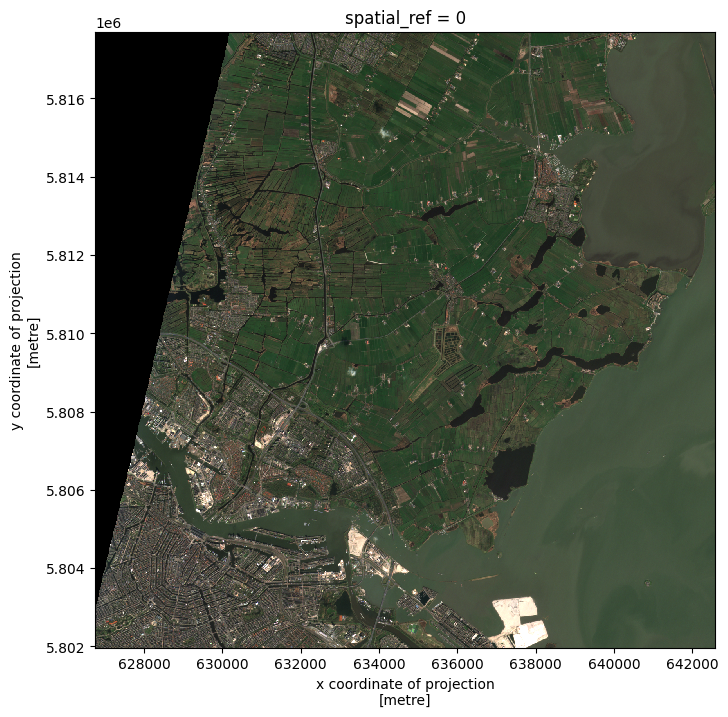

In [32]:
raster_clip_box2.plot.imshow(size = 8, aspect = 1)

In [34]:
!mkdir ../results
raster_clip_box.rio.to_raster("../results/raster_clip.tif")

### Crop raster with __vector polygons__

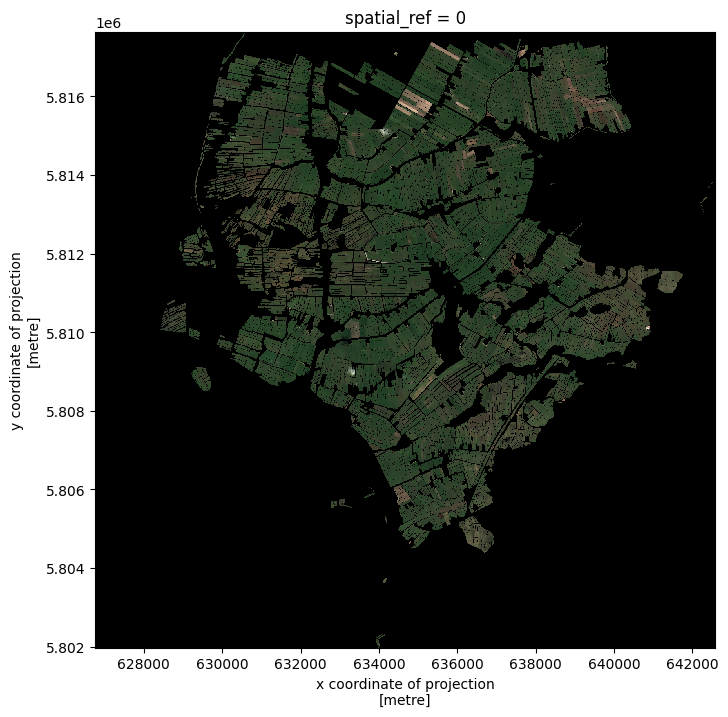

In [36]:
raster_clip_fields = raster_clip_box.rio.clip(fields['geometry']) # crops to field boundaries
raster_clip_fields.plot.imshow(figsize = (8,8))

### Exercise: Crop raster data with a specific code

1. select the gewasscode 257 -- crop codes by the Netherlands Enterprise Agency RVO
2. crop raster_clip_box with that
3. visualize image

In [42]:
# 1 select
help(fields.loc)

Help on _LocIndexer in module pandas.core.indexing object:

class _LocIndexer(_LocationIndexer)
 |  Access a group of rows and columns by label(s) or a boolean array.
 |  
 |  ``.loc[]`` is primarily label based, but may also be used with a
 |  boolean array.
 |  
 |  Allowed inputs are:
 |  
 |  - A single label, e.g. ``5`` or ``'a'``, (note that ``5`` is
 |    interpreted as a *label* of the index, and **never** as an
 |    integer position along the index).
 |  - A list or array of labels, e.g. ``['a', 'b', 'c']``.
 |  - A slice object with labels, e.g. ``'a':'f'``.
 |  
 |    .. warning:: Note that contrary to usual python slices, **both** the
 |        start and the stop are included
 |  
 |  - A boolean array of the same length as the axis being sliced,
 |    e.g. ``[True, False, True]``.
 |  - An alignable boolean Series. The index of the key will be aligned before
 |    masking.
 |  - An alignable Index. The Index of the returned selection will be the input.
 |  - A ``callable`

In [43]:
fields.loc[fields['gewascode'] == 257]

category            gewas  gewascode  jaar      status  \
1561  Bouwland  Bieten, voeder-        257  2020  Definitief   
1568  Bouwland  Bieten, voeder-        257  2020  Definitief   

                                               geometry  
1561  POLYGON ((635146.387 5815478.334, 635140.863 5...  
1568  POLYGON ((634956.946 5815584.796, 634778.695 5...

In [58]:
raster_clip_fields_257 = raster_clip_box.rio.clip(fields['geometry'].loc[fields['gewascode'] == 257])
raster_clip_fields_257

<xarray.DataArray (band: 3, y: 23, x: 40)> Size: 3kB
array([[[  0, 205, 201, ...,   0,   0,   0],
        [  0, 209, 209, ...,   0,   0,   0],
        [169, 196, 209, ...,   0,   0,   0],
        ...,
        [  0,   0,   0, ..., 108,   0,   0],
        [  0,   0,   0, ...,  97,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0]],

       [[  0, 173, 170, ...,   0,   0,   0],
        [  0, 171, 169, ...,   0,   0,   0],
        [148, 171, 176, ...,   0,   0,   0],
        ...,
        [  0,   0,   0, ...,  90,   0,   0],
        [  0,   0,   0, ...,  85,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0]],

       [[  0, 147, 145, ...,   0,   0,   0],
        [  0, 147, 147, ...,   0,   0,   0],
        [119, 141, 150, ...,   0,   0,   0],
        ...,
        [  0,   0,   0, ...,  76,   0,   0],
        [  0,   0,   0, ...,  69,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0]]], dtype=uint8)
Coordinates:
  * band         (band) int64 24B 1 2 3
  * x            (x) float64 320B 6.348e+05 6.348e+05 ... 6.352e+05 6.352e+05
  * y            (y) float64 184B 5.816e+06 5.816e+06 ... 5.815e+06 5.815e+06
    spatial_ref  int64 8B 0
Attributes:
    AREA_OR_POINT:       Area
    OVR_RESAMPLING_ALG:  AVERAGE
    scale_factor:        1.0
    add_offset:          0.0
    _FillValue:          0

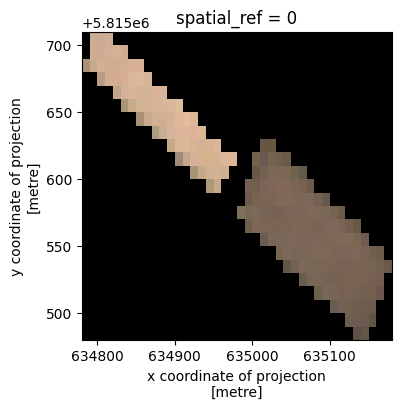

In [59]:
# 3 plot
raster_clip_fields_257.plot.imshow(size = 4, aspect = 1)

### Crop raster data with __raster data__ using the reproject_match() function

`reproject_match()`

1. auto-projects to the right CRS EPSG
2. crops to the size of the other -- matches the extent using `nodata` (and eventually sets `nodata` values) or by `clip`'ing

In [68]:
help(raster_clip_box.rio.reproject_match)

Help on method reproject_match in module rioxarray.raster_array:

reproject_match(match_data_array: Union[xarray.core.dataarray.DataArray, xarray.core.dataset.Dataset], resampling: rasterio.enums.Resampling = <Resampling.nearest: 0>, **reproject_kwargs) -> xarray.core.dataarray.DataArray method of rioxarray.raster_array.RasterArray instance
    Reproject a DataArray object to match the resolution, projection,
    and region of another DataArray.
    
    Powered by :func:`rasterio.warp.reproject`
    
    .. note:: Only 2D/3D arrays with dimensions 'x'/'y' are currently supported.
        Requires either a grid mapping variable with 'spatial_ref' or
        a 'crs' attribute to be set containing a valid CRS.
        If using a WKT (e.g. from spatiareference.org), make sure it is an OGC WKT.
    
    .. versionadded:: 0.9 reproject_kwargs
    
    Parameters
    ----------
    match_data_array:  :obj:`xarray.DataArray` | :obj:`xarray.Dataset`
        DataArray of the target resolution a

In [62]:
print(raster_clip_fields.rio.crs)

EPSG:32631


In [64]:
# Reproject the raster to permit the function to convert it back again...
raster_clip_fields_257 = raster_clip_fields_257.rio.reproject("EPSG:28992")
print(raster_clip_fields_257.rio.crs) # S(raster_clip_fields_257.rio.crs)

EPSG:28992


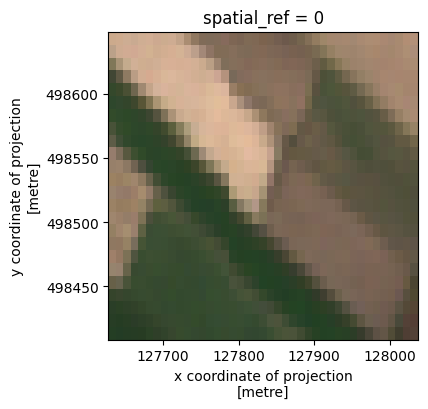

In [66]:
raster_reproject_match = raster_clip_box.rio.reproject_match(raster_clip_fields_257)
raster_reproject_match.plot.imshow(size = 4, aspect = 1)

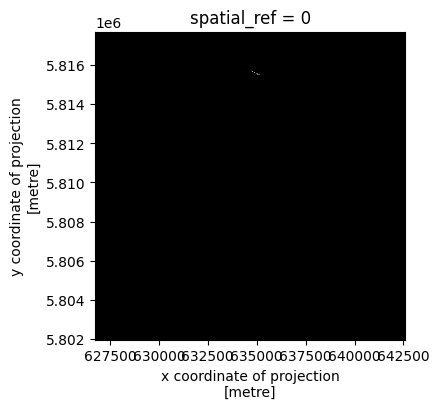

In [69]:
raster_reproject_match = raster_clip_fields_257.rio.reproject_match(raster_clip_box)
raster_reproject_match.plot.imshow(size = 4, aspect = 1)

### clear space

In [71]:
del raster, raster2, raster_overview, raster_clip_box, raster_clip_box2, raster_clip_fields, raster_clip_fields_257, raster_reproject_match

# 9 Raster calculations

- raster statistics - zonal statistics
- extract zones from vector
- convert vector to raster

# 10 Calculating Zonal Statistics on Rasters

### Making vector and raster data compatible

In [73]:
# the tif wasn't result, it was data
!mv ../results/raster_clip.tif ../data/

In [120]:
import rioxarray
ndvi = rioxarray.open_rasterio("../data/raster_clip.tif").squeeze()
print(ndvi)
ndvi.shape

<xarray.DataArray (band: 3, y: 1574, x: 1584)> Size: 7MB
[7479648 values with dtype=uint8]
Coordinates:
  * band         (band) int64 24B 1 2 3
  * x            (x) float64 13kB 6.268e+05 6.268e+05 ... 6.426e+05 6.426e+05
  * y            (y) float64 13kB 5.818e+06 5.818e+06 ... 5.802e+06 5.802e+06
    spatial_ref  int64 8B 0
Attributes:
    AREA_OR_POINT:       Area
    OVR_RESAMPLING_ALG:  AVERAGE
    _FillValue:          0
    scale_factor:        1.0
    add_offset:          0.0


(3, 1574, 1584)

In [104]:
ndvi_test = rioxarray.open_rasterio("../data/raster_clip.tif")
print(ndvi_test)
ndvi_test.shape

<xarray.DataArray (band: 3, y: 1574, x: 1584)> Size: 7MB
[7479648 values with dtype=uint8]
Coordinates:
  * band         (band) int64 24B 1 2 3
  * x            (x) float64 13kB 6.268e+05 6.268e+05 ... 6.426e+05 6.426e+05
  * y            (y) float64 13kB 5.818e+06 5.818e+06 ... 5.802e+06 5.802e+06
    spatial_ref  int64 8B 0
Attributes:
    AREA_OR_POINT:       Area
    OVR_RESAMPLING_ALG:  AVERAGE
    _FillValue:          0
    scale_factor:        1.0
    add_offset:          0.0


(3, 1574, 1584)

- `.squeeze()` does not seem to have the intended effect!

In [108]:
import xarray
help(xarray.DataArray.squeeze)

import numpy as np
help(np.squeeze)

Help on function squeeze in module xarray.core.common:

squeeze(self, dim: 'Hashable | Iterable[Hashable] | None' = None, drop: 'bool' = False, axis: 'int | Iterable[int] | None' = None) -> 'Self'
    Return a new object with squeezed data.
    
    Parameters
    ----------
    dim : None or Hashable or iterable of Hashable, optional
        Selects a subset of the length one dimensions. If a dimension is
        selected with length greater than one, an error is raised. If
        None, all length one dimensions are squeezed.
    drop : bool, default: False
        If ``drop=True``, drop squeezed coordinates instead of making them
        scalar.
    axis : None or int or iterable of int, optional
        Like dim, but positional.
    
    Returns
    -------
    squeezed : same type as caller
        This object, but with with all or a subset of the dimensions of
        length 1 removed.
    
    See Also
    --------
    numpy.squeeze

Help on function squeeze in module numpy:

sq

In [115]:
ndvi = rioxarray.open_rasterio("../data/raster_clip.tif").squeeze(axis = 0)
print(ndvi)
ndvi.shape

ValueError: cannot select a dimension to squeeze out which has length greater than one

In [121]:
import geopandas as gpd
fields = gpd.read_file("../data/geodf_bb2.shp")
fields.crs

<Projected CRS: EPSG:28992>
Name: Amersfoort / RD New
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: Netherlands - onshore, including Waddenzee, Dutch Wadden Islands and 12-mile offshore coastal zone.
- bounds: (3.2, 50.75, 7.22, 53.7)
Coordinate Operation:
- name: RD New
- method: Oblique Stereographic
Datum: Amersfoort
- Ellipsoid: Bessel 1841
- Prime Meridian: Greenwich

In [122]:
fields_utm = fields.to_crs(ndvi.rio.crs) # convert in order to use the vector data in fields as a classifier for the raster in ndvi
fields_utm.crs

<Projected CRS: EPSG:32631>
Name: WGS 84 / UTM zone 31N
Axis Info [cartesian]:
- [east]: Easting (metre)
- [north]: Northing (metre)
Area of Use:
- undefined
Coordinate Operation:
- name: UTM zone 31N
- method: Transverse Mercator
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [131]:
fields_utm.shape

(4872, 6)

### Rasterizing the vector data

- rasterize in order to calculate zonal stats
- to rasterize, we need `geometry`-`crop` pairs for each vector feature (i.e. crop type) that we need
- rasterize is to produce a grid with numerical values, here representing types of crops defined by col gewascode

In [123]:
geom = fields_utm[['geometry', 'gewascode']].values.tolist()
geom # shapely geometries and RVO codes in gewascode

[[<POLYGON ((627394.386 5812746.538, 627393.681 5812749.022, 627384.063 581279...>,
  265],
 [<POLYGON ((627326.17 5813192.913, 627324.734 5813196.828, 627324.11 5813203....>,
  265],
 [<POLYGON ((627093.646 5812863.661, 627090.972 5812870.702, 627076.762 581286...>,
  265],
 [<POLYGON ((627384.004 5813467.33, 627376.549 5813470.117, 627385.233 5813495...>,
  265],
 [<POLYGON ((627179.293 5812870.376, 627160.747 5812846.868, 627159.505 581284...>,
  331],
 [<POLYGON ((627419.816 5812765.254, 627416.356 5812766.811, 627413.1 5812769....>,
  265],
 [<POLYGON ((627358.683 5813335.376, 627362.871 5813352.853, 627370.175 581337...>,
  265],
 [<POLYGON ((627423.06 5813550.358, 627421.409 5813550.392, 627427.293 5813568...>,
  265],
 [<POLYGON ((627191.219 5813028.547, 627189.596 5813028.866, 627186.64 5813029...>,
  265],
 [<POLYGON ((627349.601 5813329.836, 627343.37 5813330.159, 627341.775 5813330...>,
  265],
 [<POLYGON ((627809.311 5811941.534, 627793.366 5811967.477, 627778.317 581199..

In [98]:
from rasterio import features

help(features.rasterize) # shapes parameter takes (gemoetry, value) pairs

Help on function rasterize in module rasterio.features:

rasterize(shapes, out_shape=None, fill=0, out=None, transform=Affine(1.0, 0.0, 0.0,
       0.0, 1.0, 0.0), all_touched=False, merge_alg=<MergeAlg.replace: 'REPLACE'>, default_value=1, dtype=None)
    Return an image array with input geometries burned in.
    
    Warnings will be raised for any invalid or empty geometries, and
    an exception will be raised if there are no valid shapes
    to rasterize.
    
    Parameters
    ----------
    shapes : iterable of (`geometry`, `value`) pairs or geometries
        The `geometry` can either be an object that implements the geo
        interface or GeoJSON-like object. If no `value` is provided
        the `default_value` will be used. If `value` is `None` the
        `fill` value will be used.
    out_shape : tuple or list with 2 integers
        Shape of output numpy ndarray.
    fill : int or float, optional
        Used as fill value for all areas not covered by input
        geo

In [130]:
print(ndvi.shape)

(3, 1574, 1584)


In [125]:
# output grid like ndvi
# transform the projection from pixel space to the projected coordinate space
bands, rows, cols = ndvi.shape
ndvi_shape = (rows, cols)
fields_rasterized = features.rasterize(geom, out_shape = ndvi_shape, transform = ndvi.rio.transform())
fields_rasterized



array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint16)

In [126]:
import numpy as np
print(fields_rasterized.shape)
print(np.unique(fields_rasterized))

(1574, 1584)
[   0  236  257  259  265  266  331  332  335  343  515  863 1936 2793]


- cannot replicate their number of x and y pixels (500, 500)
- thus finding more types of crops (indicated by the unique field code) on the fields

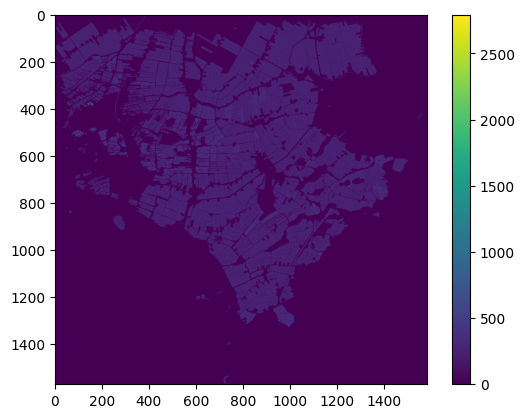

In [132]:
from matplotlib import pyplot as plt
plt.imshow(fields_rasterized)
plt.colorbar()

In [133]:
import xarray as xr

fields_rasterized_xarr = ndvi.copy()
fields_rasterized_xarr.data = fields_rasterized

fields_rasterized_xarr.plot(robust = True)

ValueError: replacement data must match the Variable's shape. replacement data has shape (1574, 1584); Variable has shape (3, 1574, 1584)

In [139]:
fields_rasterized_2D = fields_rasterized[:,:] # try drop the bands i.e. the third dimension being complained about by the ValueError...

fields_rasterized_xarr.data = fields_rasterized_2D

# fields_rasterized_xarr.plot(robust = True)

ValueError: replacement data must match the Variable's shape. replacement data has shape (1574, 1584); Variable has shape (3, 1574, 1584)

AttributeError: Rectangle.set() got an unexpected keyword argument 'robust'

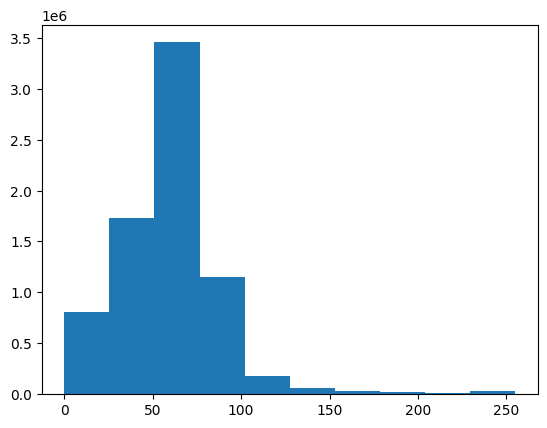

In [142]:
fields_rasterized_xarr.plot(robust = True)

In [ ]:
# xrspatial.zonal_stats # 


- something with the script doesn't work...